<!DOCTYPE html>
<html>
    <head>
        <meta name=\"viewport\" content=\"width=device-width initial-scale=1\">
        <style>
            * {
            box-sizing: border-box;
            }
            .row {
            display: flex;
            }
            .column {
            flex: 33.33%;
            padding: 5px;
            }
        </style>
    </head>
    <body>
        <div class="row">
            <div class="column">
                <img src="http://www.lncc.br/images/logo_lncc.png" alt="LNCC" style="width:18%" align="left">
            </div>
            <div class="column">
                <img src="http://dexl.lncc.br/files/logo_dexl_rgb.jpg" alt="Dexl" style="width:22%;margin-left:400px;margin-top:10px">
            </div>
            <div class="column">
                <img src="https://upload.wikimedia.org/wikipedia/pt/7/71/Cnpq-logo.jpg" alt="CENPES" style="width:20%;margin-top:-47px" align="right">
            </div>
        </div>
        <hr>
        <div align="middle">
            <h2>Desenvolvimento de Web Apps via Shiny R</h2>
            <h3>EAMC 2020</h3>
            <h4>Instrutor: Rafael Silva Pereira</h4> 
        </div>
    </body>
</html>

Neste notebook iremos falar um pouco sobre dataframes e citar algumas de suas variações

O dataframe se torna uma estrutura super importante, este tem a habilidade de estruturar dados em forma semelhante a uma tabela, formato comum utilizado para representar resultados de experimentos, onde as linhas representam observações e as colunas variaveis

Para este notebook iremos utilizar um dataset mineirado sobre projetos do site kickstarter chamado kickstarter.csv

In [1]:
Kickstarter=read.csv("Kickstarter.csv")

In [2]:
class(Kickstarter)

[1] "data.frame"

In [4]:
dim(Kickstarter)

[1] 4008   37

In [3]:
head(Kickstarter)

backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,⋯,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
80,"If you've ever been disheartened by how some people might represent the character of Christ, this is the book for you.","{""id"":48,""name"":""Nonfiction"",""slug"":""publishing/nonfiction"",""position"":9,""parent_id"":18,""color"":14867664,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/publishing/nonfiction""}}}",3651,US,1364866426,"{""id"":101710808,""name"":""Neal Samudre"",""is_registered"":true,""chosen_currency"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/007/433/802/5a05d2657311dda3493f755809a13ce5_original.jpg?w=40&h=40&fit=crop&v=1461457087&auto=format&q=92&s=de68f6f512ab848889660eff97785bd9"",""small"":""https://ksr-ugc.imgix.net/assets/007/433/802/5a05d2657311dda3493f755809a13ce5_original.jpg?w=160&h=160&fit=crop&v=1461457087&auto=format&q=92&s=8a693b4b2db9d0c81049be28174d30e3"",""medium"":""https://ksr-ugc.imgix.net/assets/007/433/802/5a05d2657311dda3493f755809a13ce5_original.jpg?w=160&h=160&fit=crop&v=1461457087&auto=format&q=92&s=8a693b4b2db9d0c81049be28174d30e3""},""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/101710808""},""api"":{""user"":""https://api.kickstarter.com/v1/users/101710808?signature=1536906692.49e83297aa69d354118a4b52764ffae51db55ae3""}}}",USD,$,true,⋯,how-weve-changed-jesus-neal-samudres-debut-book,https://www.kickstarter.com/discover/categories/publishing/nonfiction,true,false,successful,1365789635,1.0000000,"{""web"":{""project"":""https://www.kickstarter.com/projects/101710808/how-weve-changed-jesus-neal-samudres-debut-book?ref=category_newest"",""rewards"":""https://www.kickstarter.com/projects/101710808/how-weve-changed-jesus-neal-samudres-debut-book/rewards""}}",3651.0000,international
31,This book will show you how to attract your ideal client and get them to buy from you again and again without ever selling.,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishing/nonfiction"",""position"":9,""parent_id"":18,""color"":14867664,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/publishing/nonfiction""}}}",326,GB,1482012501,"{""id"":270084862,""name"":""Scott C. Campbell"",""is_registered"":true,""chosen_currency"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/014/918/680/3ca628ee12fe98dcf17e859eaa7438e1_original.JPG?w=40&h=40&fit=crop&v=1482010204&auto=format&q=92&s=9b224a044b4312cce4a8057dc56800ad"",""small"":""https://ksr-ugc.imgix.net/assets/014/918/680/3ca628ee12fe98dcf17e859eaa7438e1_original.JPG?w=160&h=160&fit=crop&v=1482010204&auto=format&q=92&s=cfb4a9568a8849d860255653edb453d8"",""medium"":""https://ksr-ugc.imgix.net/assets/014/918/680/3ca628ee12fe98dcf17e859eaa7438e1_original.JPG?w=160&h=160&fit=crop&v=1482010204&auto=format&q=92&s=cfb4a9568a8849d860255653edb453d8""},""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/270084862""},""api"":{""user"":""https://api.kickstarter.com/v1/users/270084862?signature=1536906911.af67c970df0e557656c25eb5b939f7a33ec0f517""}}}",GBP,£,false,⋯,your-client-vision-book-how-to-sell-without-sellin,https://www.kickstarter.com/discover/categories/publishing/nonfiction,true,false,successful,1484606700,1.2473525,"{""web"":{""project"":""https://www.kickstarter.com/projects/270084862/your-client-vision-book-how-to-sell-without-sellin?ref=category_newest"",""rewards"":""https://www.kickstarter.com/projects/270084862/your-client-vision-book-how-to-sell-without-sellin/rewards""}}",338.0325,international
357,"Our goal is to re-publish 500 old Christian books. Available to read online, to download, or as physical books. Help us make it!","{""id"":48,""name"":""Nonfiction"",""slug"":""publishing/nonfiction"",""position"":9,""parent_id"":18,""color"":14867664,""urls"":{""web"":{""discover"":""http

Vemos que este dataset possui 37 variaveis e 4008 observações, quais são os nomes destas variaveis?

In [5]:
names(Kickstarter)

[1] "backers_count"            "blurb"                   
 [3] "category"                 "converted_pledged_amount"
 [5] "country"                  "created_at"              
 [7] "creator"                  "currency"                
 [9] "currency_symbol"          "currency_trailing_code"  
[11] "current_currency"         "deadline"                
[13] "disable_communication"    "friends"                 
[15] "fx_rate"                  "goal"                    
[17] "id"                       "is_backing"              
[19] "is_starrable"             "is_starred"              
[21] "launched_at"              "location"                
[23] "name"                     "permissions"             
[25] "photo"                    "pledged"                 
[27] "profile"                  "slug"                    
[29] "source_url"               "spotlight"               
[31] "staff_pick"               "state"                   
[33] "state_changed_at"         "static_usd_rate"         
[35] "urls"                     "usd_pledged"             
[37] "usd_type"

Podemos verificar o tipo de cada variavel com um loop, mais tarde no curso sera demonstrado formas mais eficientes

In [6]:
for(i in 1:ncol(Kickstarter))
    cat("A variavel",names(Kickstarter)[i]," tem tipo ",class(Kickstarter[,i]),"\n")

A variavel backers_count  tem tipo  integer 
A variavel blurb  tem tipo  factor 
A variavel category  tem tipo  factor 
A variavel converted_pledged_amount  tem tipo  integer 
A variavel country  tem tipo  factor 
A variavel created_at  tem tipo  integer 
A variavel creator  tem tipo  factor 
A variavel currency  tem tipo  factor 
A variavel currency_symbol  tem tipo  factor 
A variavel currency_trailing_code  tem tipo  factor 
A variavel current_currency  tem tipo  factor 
A variavel deadline  tem tipo  integer 
A variavel disable_communication  tem tipo  factor 
A variavel friends  tem tipo  factor 
A variavel fx_rate  tem tipo  numeric 
A variavel goal  tem tipo  numeric 
A variavel id  tem tipo  integer 
A variavel is_backing  tem tipo  factor 
A variavel is_starrable  tem tipo  factor 
A variavel is_starred  tem tipo  factor 
A variavel launched_at  tem tipo  integer 
A variavel location  tem tipo  factor 
A variavel name  tem tipo  factor 
A variavel permissions  tem tipo  factor

variaveis numericas poidem ter medidas estatisticas calculadas sobre estas como media mediana, desvio padrão minimo e maximo, já variaveis categoricas podem ter medidas como moda, distribuição de frequencia etc

Vemos que a variavel backers_count é a primeira variavel do dataframe, ela pode ser acessada de 3 diferentes formas:

In [7]:
Kickstarter[1:10,1]

[1]  80  31 357  74  12 667  44  30  86 546

In [8]:
Kickstarter[1:10,"backers_count"]

[1]  80  31 357  74  12 667  44  30  86 546

In [9]:
Kickstarter$backers_count[1:10]

[1]  80  31 357  74  12 667  44  30  86 546

Vemos então que ela pode ser acessado pelo indice, nome da variavel, ou como objeto pela notação $ do R

In [10]:
summary(Kickstarter$backers_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    21.0    56.0   154.6   129.0 11686.0 

In [11]:
summary(Kickstarter$converted_pledged_amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1098    3709   10725    8947  684755 

In [12]:
table(Kickstarter$country)


  AT   AU   BE   CA   CH   DE   DK   ES   FR   GB   HK   IE   IT   LU   MX   NL 
  10   76   10  118    7   31   12   21   22  370    5    6   20    3   11   29 
  NO   NZ   SE   SG   US 
   4   21   27    4 3201 

Observamos então propriedades de 3 variaveis, quantos usuarios deram dinheiro a um projeto, quantos dolares foram arrecadados e qual o pais de origem do projeto, o acesso em um data frame tambem pode ser escrito como condição de filtro, criando uma expressão lógica onde ele so retorna os elementos em que esta sera verdadeira

In [13]:
Kickstarter$backers_count[Kickstarter$country=="CH"]

[1]    1    0    3    1    1 1050    0

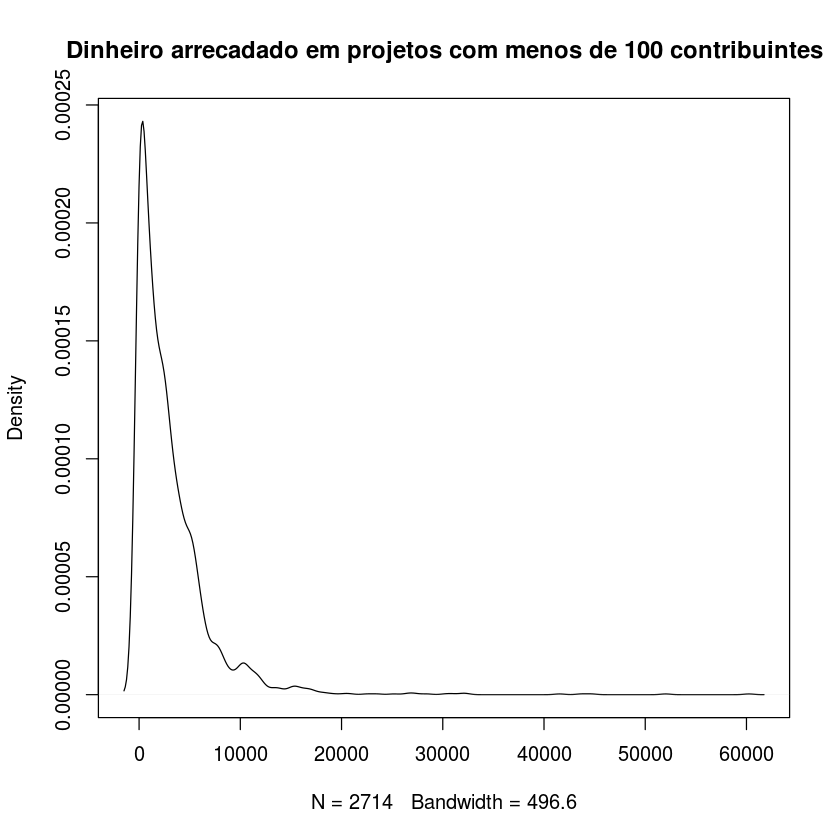

In [17]:
plot(density(Kickstarter$converted_pledged_amount[Kickstarter$backers_count<100] ),main="Dinheiro arrecadado em projetos com menos de 100 contribuintes" )

Podemos gerar propriedades sobre todo o dataframe, como por exemplo

In [19]:
summary(Kickstarter)

 backers_count    
 Min.   :    0.0  
 1st Qu.:   21.0  
 Median :   56.0  
 Mean   :  154.6  
 3rd Qu.:  129.0  
 Max.   :11686.0  
                  
                                                                                                                                    blurb     
 Publishing the 'Wife in Space' blog as a series of collectable ebooks and limited edition paperbacks.                                 :   4  
 Publishing the 'Wife in Space' blog as a collectable series of ebooks and limited edition paperbacks.                                 :   3  
 Award Winning Footwear Designs | Crafted Using Italian Leathers with Bold and Comfortable Features | London Navy Men's Luxury Footwear:   2  
 More Star Wars toys as found in the newspaper ads of the seventies and eighties!                                                      :   2  
 1000 years after force awakens and new characters. You get to learn more about the Sith. The first Star Wars to be rated mature.    

Podemos gerar vizualizações sobre nosso dataset com R nativo como:

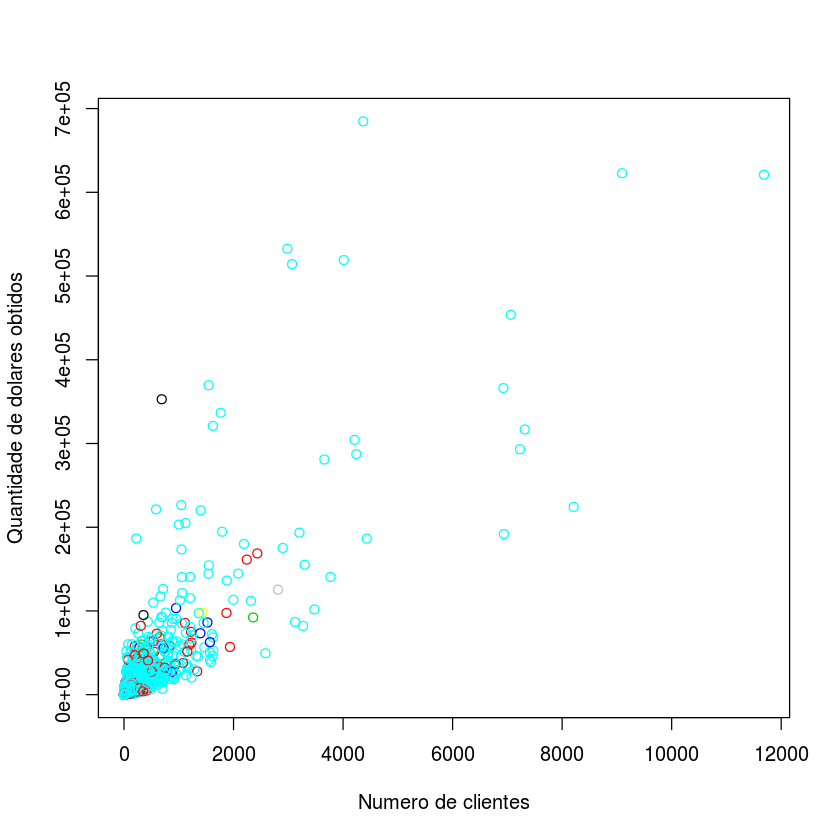

In [20]:
plot(Kickstarter$backers_count,Kickstarter$converted_pledged_amount,col = Kickstarter$country,xlab='Numero de clientes',ylab='Quantidade de dolares obtidos')

Mas se queremos gerar graficos mais elaborados, nos utilizaremos de um dos membros do tidyverse, o pacote ggplot2

In [21]:
require(ggplot2)

Loading required package: ggplot2


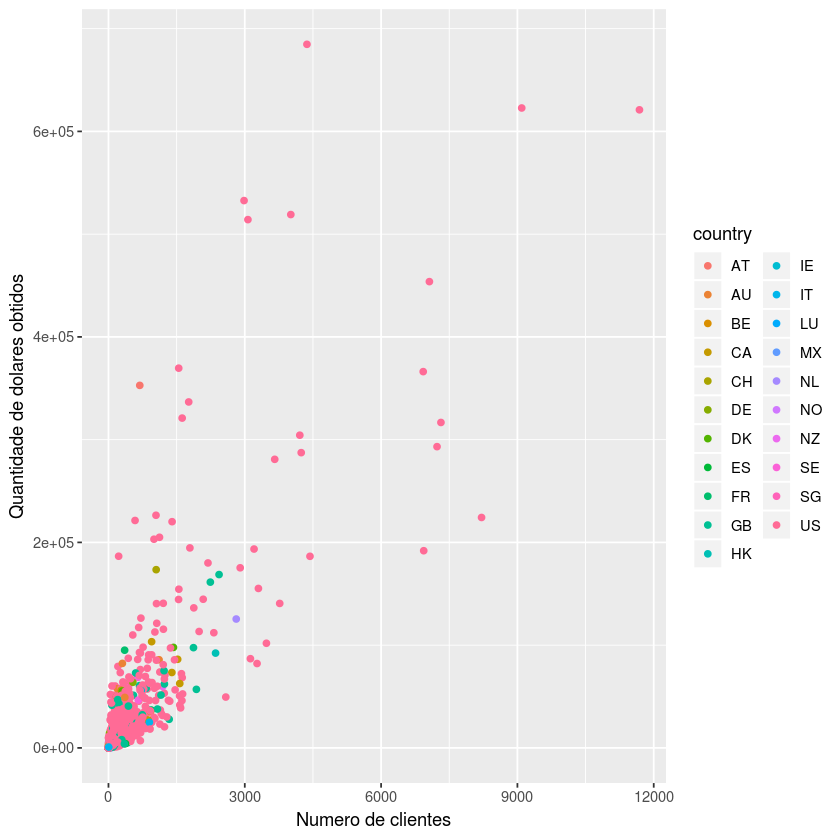

In [22]:
ggplot(data=Kickstarter) + geom_point(aes(x=backers_count,y=converted_pledged_amount,col=country)) + labs(x="Numero de clientes",y="Quantidade de dolares obtidos")

Outras vizualizações possiveis seriam vizualizações de distribuições, como por exemplo

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

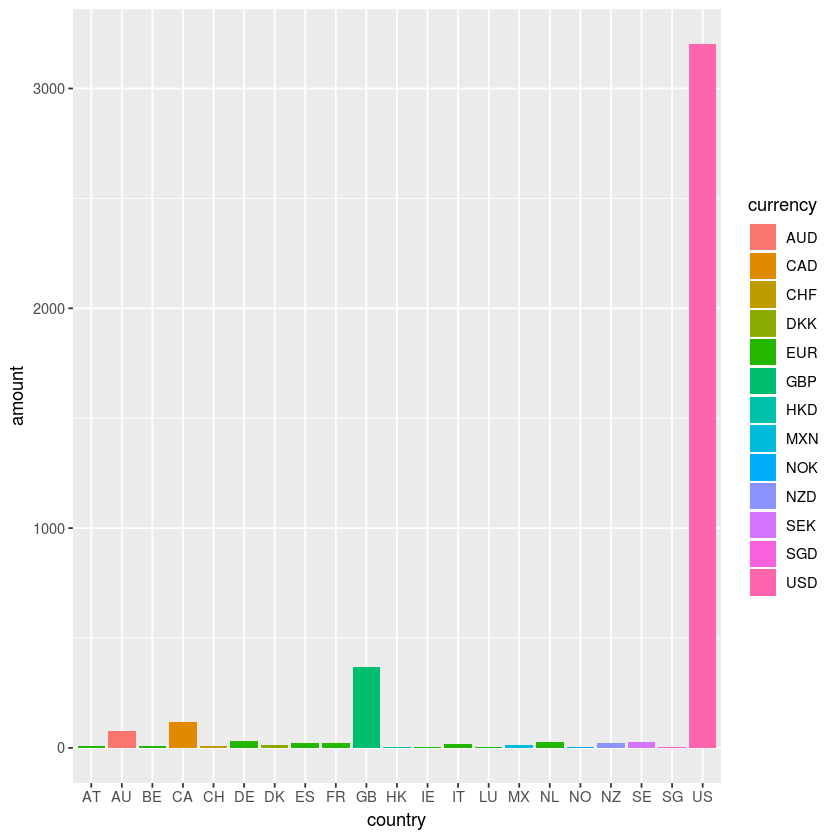

In [23]:
ggplot(data=Kickstarter) + geom_histogram(aes(x=country,fill=currency),stat='count') + labs(y="amount")

Assim temos algumas propriedades de dataframes, a partir destes existem modificações sobre estes que focam em determinadas otimizações

Para aqueles que gostam de fazer o processo analitico de forma que lembra uma query SQL utilizamos a biblioteca dplyr outro membro do tidyverse

In [24]:
require(dplyr)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [37]:
Kickstarter %>% 
select("backers_count","country","converted_pledged_amount") %>%
filter(backers_count>0) %>%
group_by(country) %>%
mutate(Donation=converted_pledged_amount/backers_count) %>%
summarize(MeanDonation=mean(Donation,na.rm=TRUE),StandartDevation=sd(Donation,na.rm=TRUE),MinDonation=min(Donation,na.rm=TRUE),MaxDonation=max(Donation,na.rm=TRUE))

country,MeanDonation,StandartDevation,MinDonation,MaxDonation
AT,103.65836,149.771563,14.750000,512.08273
AU,89.58128,142.794649,0.000000,1131.75000
BE,65.13415,34.925319,20.285714,112.84211
CA,70.36605,88.088853,0.000000,818.00000
CH,177.03924,304.934961,1.000000,708.00000
DE,117.52580,143.931988,10.000000,595.25000
DK,75.94043,62.164057,4.142857,182.05000
ES,39.96689,24.078807,10.000000,81.40000
FR,99.32377,95.416933,1.000000,347.61765
GB,59.65921,53.301297,1.000000,546.51316


Este responde dado cada pais qual a doação media,desvio padrão minimo e maximo em um determinado projeto

Outro Tipo de estrutura interessante quando o foco do usuario é desempenho é a estrutura data.table

In [38]:
require(data.table)

Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [39]:
Kicks=as.data.table(Kickstarter)
class(Kicks)

[1] "data.table" "data.frame"

In [43]:
Kicks[country=="US" & backers_count>5000]

backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,⋯,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
7063,This PREMIUM faux-leather planner will guide you in setting & accomplishing your #1 goal in 100 days. Begin YOUR journey to freedom!,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishing/nonfiction"",""position"":9,""parent_id"":18,""color"":14867664,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/publishing/nonfiction""}}}",453803,US,1439675465,"{""id"":1952999335,""name"":""John Lee Dumas"",""slug"":""eofire"",""is_registered"":true,""chosen_currency"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/008/133/751/4d9c39118f942029f75fceab95e3169d_original.jpg?w=40&h=40&fit=crop&v=1461504999&auto=format&q=92&s=7363f308128f072f67e02ff73921c909"",""small"":""https://ksr-ugc.imgix.net/assets/008/133/751/4d9c39118f942029f75fceab95e3169d_original.jpg?w=160&h=160&fit=crop&v=1461504999&auto=format&q=92&s=0f2692137c3c1913bc5475b747ddcae7"",""medium"":""https://ksr-ugc.imgix.net/assets/008/133/751/4d9c39118f942029f75fceab95e3169d_original.jpg?w=160&h=160&fit=crop&v=1461504999&auto=format&q=92&s=0f2692137c3c1913bc5475b747ddcae7""},""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/eofire""},""api"":{""user"":""https://api.kickstarter.com/v1/users/1952999335?signature=1536906863.f788a4b021c8d818912cc0d7756d74bde6c156f5""}}}",USD,$,true,⋯,the-freedom-journal-accomplish-your-1-goal-in-100,https://www.kickstarter.com/discover/categories/publishing/nonfiction,true,false,successful,1454727600,1,"{""web"":{""project"":""https://www.kickstarter.com/projects/eofire/the-freedom-journal-accomplish-your-1-goal-in-100?ref=category_newest"",""rewards"":""https://www.kickstarter.com/projects/eofire/the-freedom-journal-accomplish-your-1-goal-in-100/rewards""}}",453803.4,international
8211,"A book about mastering the art of change — how to change habits & deal with life changes, frustrations with others, and more.","{""id"":48,""name"":""Nonfiction"",""slug"":""publishing/nonfiction"",""position"":9,""parent_id"":18,""color"":14867664,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/publishing/nonfiction""}}}",224255,US,1410679178,"{""id"":532372598,""name"":""Leo Babauta"",""is_registered"":true,""chosen_currency"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/005/852/618/de242c92a57c15344d3a1e3b61736532_original.jpg?w=40&h=40&fit=crop&v=1461089128&auto=format&q=92&s=e3e3e49aec5ef0473d45911386630d2a"",""small"":""https://ksr-ugc.imgix.net/assets/005/852/618/de242c92a57c15344d3a1e3b61736532_original.jpg?w=160&h=160&fit=crop&v=1461089128&auto=format&q=92&s=2a8dae46d5dc4b7139e7148feae9ccc9"",""medium"":""https://ksr-ugc.imgix.net/assets/005/852/618/de242c92a57c15344d3a1e3b61736532_original.jpg?w=160&h=160&fit=crop&v=1461089128&auto=format&q=92&s=2a8dae46d5dc4b7139e7148feae9ccc9""},""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/532372598""},""api"":{""user"":""https://api.kickstarter.com/v1/users/532372598?signature=1536906805.7f411c0f8abe2b0ef2ff409eeaf080239eadf38c""}}}",USD,$,true,⋯,zenhabits,https://www.kickstarter.com/discover/categories/publishing/nonfiction,true,true,successful,1418846412,1,"{""web"":{""project"":""https://www.kickstarter.com/projects/532372598/zenhabits?ref=category_newest"",""rewards"":""https://www.kickstarter.com/projects/532372598/zenhabits/rewards""}}",224255.0,international
9095,A universal vehicle accessory turning your smartphone into a head-up display (HUD) for any car,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/gadgets"",""position"":7,""parent_id"":16,""color"":6526716,""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/technology/gadgets""}}}",622785,US,1427867917,"{""id"":361842686,""name"":""HUDWAY"",""slug"":""hudw

In [45]:
Kicks[converted_pledged_amount>10000,backers_count,by=country]

country,backers_count
US,357
US,667
US,546
US,157
US,207
US,220
US,1189
US,99
US,250
US,437


A grande vantagem do data.table em relação a outros tipos é sua alta velocidade , e naturalmente poder se utilizar de todos os cores de uma maquina para atuar suas operações, sendo naturalmente paralelizadas

### Exercicios Data Frame

O dataset Kickstarter tem uma variavel chamada state que indica se o projeto teve sucesso, falhou, etc

Utilizando a estrutura que quiser das apresentadas acima isole apenas os projetos que tiverem falhado
destes localize os que tiveram ao menos um doador

Tendo esta informação para cada pais verifique a razão entre converted pledged amount e backers count, e compare esta com a razão dos projetos que foram um sucesso

Aparenta que estas razões são diferentes para certos paises?

# Exercicio 2 Desafio

Considere o resultado obtido anteriormente.

Agregue os projetos por pais e por estado.

Explore então que variaveis do dataset aparentam determinar o estado do projeto.

É valido utilizar gráficos, testes estatisticos etc. para fazelo.

Após ter sua conclusão sobre que variaveis são realmente de interesse para cada pais em determinar o estado final do projeto utilize a seguinte lista de comandos para cada pais:

require(caret)
data<-'Seu Data.Frame'
modelo<-train(data,state~.,method="rpart")
rattle::fancyRpartPlot(modelo$finalModel)

e observe se as variaveis selecionadas pela arvore de decisão são similares a sua escolha